<a href="https://colab.research.google.com/github/cu-applied-math/stem-camp-notebooks/blob/master/2021/PythonAdvanced/A_Search_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='top'></a>

# Machine Learning STEM CAMP 2021
## Advanced Python
#### Modified by Allison Liu from CSCI 3202




---
A* Search Algorithm
---

In [ ]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict

# added packages
import heapq
from matplotlib import colors
from matplotlib.colors import ListedColormap


Consider the map of the area to the west of the Engineering Center given below, with a fairly coarse Cartesian grid superimposed.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/engineering_center_grid_zoom.png" style="width: 800px;"/>

The green square at $(x,y)=(1,15)$ is the starting location, and you would like to walk from there to the yellow square at $(25,9)$. The filled-in blue squares are obstacles, and you cannot walk through those locations.  You also cannot walk outside of this grid.

Legal moves in the North/South/East/West directions have a step cost of 1. Moves in the diagonal direction (for example, from $(1,15)$ to $(2,14)$) are allowed, but they have a step cost of $\sqrt{2}$. 


In [ ]:
#Some tuples defining the wall and state locations, for your convenience

walls = [(1,y) for y in range(2,15)] + [(2,y) for y in range(3,14)] + [(3,y) for y in range(4,13)] + \
        [(4,y) for y in range(5,12)] + [(x,1) for x in range(5,24)] + [(10,y) for y in range(9,13)] + \
        [(x,y) for x in range(11,14) for y in range(9,15)] + [(14,y) for y in range(11,15)] + \
        [(x,y) for x in range(21,26) for y in range(11,17)] + \
        [(x,y) for x in [0,26] for y in range(0,18)] + [(x,y) for x in range(0,26) for y in [0,17]]
        
states = [(x,y) for x in range(1,26) for y in range(1,17)]

[Back to top](#top)
<a id='p1'></a>


---
## Part 1:  Route-finding
In this problem, our goal is to find the path from the green to yellow squares with the **shortest total path length**.

Of course, you can probably do this problem (and likely have to some degree, in your head) without a search algorithm. But that will hopefully provide a useful "sanity check" for your answer.

#### Part A
Write a function `adjacent_states(state)`:
* takes a single argument `state`, which is a tuple representing a valid state in this state space
* returns in some form the states reachable from `state` and the step costs. How exactly you do this is up to you.

In [ ]:
# Your adjacency here
def adjacent_states(state):
        '''Takes a single argument state, which is a tuple representing a valid state in this state space.
        Returns in the form of a dictionary the states reachable from state and the step costs.
        '''
        ### NOTE: VARIABLE"walls" MUST BE DEFINED ABOVE
        possible_states={}
        possible_states[state]={}
        
        if state in walls:
            return
        elif state not in walls:
            x=state[0]
            y=state[1]
            if (x,y+1) not in walls: #North
                possible_states[(x,y)][(x,y+1)]=1
            if (x,y-1) not in walls: #South
                possible_states[(x,y)][(x,y-1)]=1
            if (x+1,y) not in walls: #East
                possible_states[(x,y)][(x+1,y)]=1
            if (x-1,y) not in walls: #West
                possible_states[(x,y)][(x-1,y)]=1
            if (x+1,y+1) not in walls: #North East
                possible_states[(x,y)][(x+1,y+1)]=np.sqrt(2)
            if (x-1,y+1) not in walls: #North West
                possible_states[(x,y)][(x-1,y+1)]=np.sqrt(2)
            if (x+1,y-1) not in walls: #South East
                possible_states[(x,y)][(x+1,y-1)]=np.sqrt(2)
            if (x-1,y-1) not in walls: #South West
                possible_states[(x,y)][(x-1,y-1)]=np.sqrt(2)
            return possible_states

Print to the screen the output for `adjacent_states((1,15))`.

In [ ]:
adjacent_states((1,15))

{(1, 15): {(1, 16): 1,
  (2, 14): 1.4142135623730951,
  (2, 15): 1,
  (2, 16): 1.4142135623730951}}

#### Part B
Write a `heuristic function`.
1. `heuristic_eucl(state, goal)` = Euclidean distance between the argument `state` and the `goal`

In [ ]:
def heuristic_eucl(state, goal):
    '''returns Euclidean distance between the argument state and the goal'''
    # state is a tuple of the form (x1, y1), goal is a tuple of the form (x2, y2)
    # euclidean distance
    x_s=state[0]
    x_g=goal[0]
    y_s=state[1]
    y_g=goal[1]
    return (np.sqrt((x_g-x_s)**2+(y_g-y_s)**2))

#### Part D
Use A\* search and the `heuristic_eucl` heuristic to find the shortest path from the initial state at $(1,15)$ to the goal state at $(25,9)$. Your search **should not** build up the entire state space graph in memory. Instead, use the `adjacent_states` function from Part A.

In [ ]:
def astar_search(start, goal, possible_states, heuristic, return_cost=False, return_nexp=False):
    parent = {start:None}
    frontier = Frontier_PQ(start, 0)
    visited = []
    nodes_expanded = 0
    state_graph={}
    
    while frontier.q:
        if not frontier.q:
            print("Failure!")
        currNode = frontier.pop() #pop lowest cost node
        currCity = currNode[1]
        visited = visited + [currCity]
        state_graph=possible_states(currCity)
#         state_graph.update(possible_states(currCity))
        found_path_parent = get_reverse_path(start, currNode[1], parent)
        found_path = path(found_path_parent, currNode[1])
        currCost = path_cost(found_path)

        nodes_expanded +=1

        # If we are at the goal:
        if currCity == goal:
            astar_path = get_reverse_path(start, goal, parent)
            solution = path(astar_path, goal) # path
            solution_cost = path_cost(solution)
            nodes_expanded = len(visited)-1
            if(return_cost==False and return_nexp==False):
                return solution
            elif(return_cost==True and return_nexp==False):
                return [solution, solution_cost]
            elif(return_cost==False and return_nexp==True):
                return [solution,None ,nodes_expanded]
            elif(return_cost==True and return_nexp==True):
                return [solution, solution_cost, nodes_expanded]

        for child in state_graph[currNode[1]]:
            child_cost = state_graph[currNode[1]][child]
            ttl_cost = currCost+child_cost+heuristic(child, goal)
            if (child not in visited) and (child not in frontier.states):
                frontier.add(child, ttl_cost)
                frontier.states[child] = ttl_cost
                parent[child]=currCity
            elif (child in frontier.states) and (ttl_cost < frontier.states[child]):
                index = frontier.q.index((frontier.states[child], child))
                frontier.q[index]=(ttl_cost, child)
                frontier.q.sort()
                frontier.states[child] = ttl_cost
                parent[child]=currCity

# Takes instantiation arguments state, cost
# start is the initial state(e.g. start='chi'), cost is the initial path cost
class Frontier_PQ:
    #instantiation arguments
    def __init__(self, start, cost):
        self.start = str(start)
        self.cost = str(cost)
        self.states = {}
        self.q = [(cost,start)]
        heapq.heapify(self.q)
    
    def __eq__(self, other):
        return self.key==other.key
    
    def add(self, state, cost):
        heapq.heappush(self.q,(cost, state))
        return
    
    def pop(self):
        lowest_cost_node = heapq.heappop(self.q)
        return lowest_cost_node
    
    def replace(self, state, newcost, index):
        heapq[index]=(self.q, (newcost, state))
        return

# path function
def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

#path from destination to source
def get_reverse_path(start, goal, parent):
    invpath = {goal:parent[goal]}
    found_path=dict()
    while goal != start:
        goal = parent[goal]
        invpath[goal] = parent[goal]
    for k in reversed(list(invpath.keys())):
        found_path[k] = invpath[k]
    return found_path

def path_cost(path):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)-1):
        cost += distance_formula(path[s], path[s+1])
    return cost

In [ ]:
start = (1,15)
goal = (25,9)
astar_path = astar_search(start, goal, adjacent_states, heuristic_eucl, return_cost=True, return_nexp=False)
print("optimal path =", astar_path[0], "\ncost =", astar_path[1])

optimal path = [(1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 14), (16, 13), (17, 13), (18, 12), (19, 12), (20, 11), (21, 10), (22, 10), (23, 10), (24, 9), (25, 9)] 
cost = 26.485281374238575


#### Part E
Make a figure depicting the optimal route from the initial state to the goal, similarly to how you depicted the maze solution in Homework 2.

In [ ]:
def plot_maze(maze, walls, path=None, title=None, pathLength = None, lineColor='black'):
    fig, ax = plt.subplots()
    
    # Set start and end to be different colors, just for visualization
    maze[15][1]=1
    maze[9][25]=2
    # Make walls a different color
    for w in walls:
        maze[w[1]][w[0]]=-1

    colors = 'steelblue lightgray green yellow'.split()
    cmap = ListedColormap(colors, name='colors', N=None)
    
    img = ax.matshow(maze, zorder=1, cmap=cmap)
            
    size = max(len(maze)+1, len(maze[0])+1)
    labels = np.arange(0,size,1)
    ax.spines['left'].set_position(('axes', 0))
    ax.spines['bottom'].set_position(('axes', 0))
    # ax.spines['right'].set_color('none')
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    # Shift ticks to be at 0.5, 1.5, etc
    locs = np.arange(26)
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_ticks(locs + 0.5, minor=True)
        axis.set(ticks=locs, ticklabels=labels)
    # Turn on the grid for the minor ticks
    ax.grid(True, which='minor')
    ax.set_xlim([0.5,25.5])
    ax.set_ylim([0.5,16.5])
    
    if path!=None:
        x_vals = [x[0] for x in path]
        y_vals = [x[1] for x in path]
        ax.plot(x_vals, y_vals, zorder=2, Color=lineColor)
        start = (x_vals[0], y_vals[0])
        end = (x_vals[-1], y_vals[-1])
        ax.annotate('start', xy = start, Color=lineColor)
        ax.annotate('end', xy = end, Color=lineColor)
        
    if title!=None:
        ax.set_title(title)
        
    if pathLength!=None:
        txt = ('Path Length = '+str(pathLength))
        plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
        
    plt.show()
    return

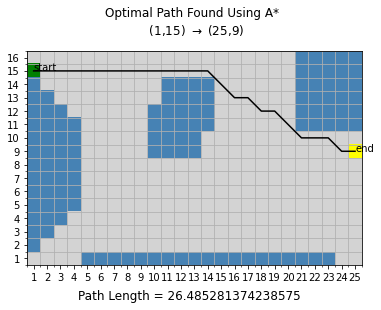

In [ ]:
plot_title = 'Optimal Path Found Using A* \n' + r' (1,15) $\rightarrow$ (25,9)'
plot_maze(np.zeros([18,27]), walls, path=astar_path[0], pathLength = astar_path[1], title = plot_title)

What is the optimal path? Is there more than one?

Comment: There are many possible unique optimal paths (with the same cost) other than the one found by my A* algorithm. Another optimal path, from $(1,15) \rightarrow(14,15) \rightarrow (20,9) \rightarrow (25,9)$, is shown above in gray.

This can also be used on the Traveling Salesman problem. If you finish early, let me know!